In [1]:
from pandas import DataFrame as df
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import googlemaps as gc
import matplotlib
import matplotlib.pyplot as plt

client = gc.Client(key="Nice Try")

In [47]:
data = pd.read_csv("C:\\Users\\brans\\Documents\\DataStructuresFinal\\data\\expandedWorcesterMedicalCenters.csv")

In [48]:
data

,PRVDR_CTGRY_SBTYP_CD,PRVDR_CTGRY_CD,CHOW_CNT,CHOW_DT,CITY_NAME,ACPTBL_POC_SW,CMPLNC_STUS_CD,SSA_CNTY_CD,CROSS_REF_PROVIDER_NUMBER,CRTFCTN_DT,...,OTHR_SRGRY_SW,PAIN_SRGRY_SW,PLSTC_SRGRY_SW,FT_SRGRY_SW,SB_SW,SB_SIZE_CD,TCHNLGST_2_YR_RDLGC_CNT,TCHNLGST_ASCT_DGR_CNT,TCHNLGST_BS_BA_DGR_CNT,DLYS_STN_CNT
0,1.0,1,2,NaN,LEOMINSTER,N,A,170,220094,19930414,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,1.0,1,0,NaN,ATHOL,N,A,170,221303,19980508,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,1.0,1,0,NaN,SOUTHBRIDGE,N,A,170,NaN,19930823,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,1.0,1,0,NaN,WEBSTER,N,A,170,NaN,19930909,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,1.0,1,0,NaN,WORCESTER,N,A,170,220163,19881005,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2.0,11,0,NaN,RUTLAND,Y,A,170,NaN,19921207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,2.0,11,0,NaN,WESTBORO,Y,A,170,NaN,19930210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2.0,11,0,NaN,UXBRIDGE,Y,A,170,NaN,19921116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,2.0,11,0,NaN,NORTH GRAFTON,Y,A,170,NaN,19921229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
def create_address(street:str, city:str, state:str = "MA"):
    #Creating the address 
    address = f"{street}, {city}, {state}"
    location = client.geocode(address)
    return location

In [ ]:
print(my[1][0]["geometry"]["location"])

In [ ]:
col = ["Name", "Provider Number", "Lat", "Long"]
new_df = df(columns = col)

In [ ]:
new_df

In [ ]:
for index, row in data.iterrows():
    ll = create_address(row["ST_ADR"], row["CITY_NAME"])[1][0]["geometry"]["location"]
    new_df.loc[len(new_df.index)] = [row["FAC_NAME"], row["PRVDR_NUM"], ll["lat"], ll["lng"]]

In [ ]:
new_df

In [2]:
countymap = gpd.read_file("C:\\Users\\brans\\Documents\\DataStructuresFinal\\data\\worcester_county_shapefiles\\tl_2023_25027_edges.shp")

In [3]:
countymap

,STATEFP,COUNTYFP,TLID,TFIDL,TFIDR,MTFCC,FULLNAME,SMID,LFROMADD,LTOADD,...,TTYP,DECKEDROAD,ARTPATH,PERSIST,GCSEFLG,OFFSETL,OFFSETR,TNIDF,TNIDT,geometry
0,25,027,39986571,215558844,215583377,S1400,Young Rd,2759,29,99,...,None,N,N,None,N,N,N,83906092,83905757,"LINESTRING (-71.95673 42.68474, -71.95677 42.6..."
1,25,027,40155525,215558844,215589311,P0002,None,None,None,None,...,None,None,None,None,N,N,N,83991326,83991326,"LINESTRING (-71.95976 42.68431, -71.95972 42.6..."
2,25,027,39986617,215558848,262695529,H3010,None,3941,None,None,...,None,None,N,P,N,N,N,83906121,83906120,"LINESTRING (-71.94344 42.67579, -71.94322 42.6..."
3,25,027,39986886,215558848,215559438,S1400,Lake Rd,2759,None,None,...,None,N,N,None,N,N,N,83906305,83906376,"LINESTRING (-71.94282 42.67681, -71.94305 42.6..."
4,25,027,39986616,215558848,215558871,S1400,Lake Rd,2759,None,None,...,None,N,N,None,N,N,N,83906120,83906304,"LINESTRING (-71.94247 42.67601, -71.94246 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108202,25,027,40037489,207656702,215582002,P0001,None,None,None,None,...,None,None,None,None,N,N,N,81672603,81672614,"LINESTRING (-71.57267 42.26420, -71.57295 42.2..."
108203,25,027,39847565,211580023,215554583,P0001,None,None,None,None,...,None,None,None,None,N,N,N,64466800,64466874,"LINESTRING (-72.21629 42.25784, -72.21651 42.2..."
108204,25,027,642306101,263927168,263927167,P0001,None,None,None,None,...,None,None,None,None,N,N,N,425278758,425278759,"LINESTRING (-72.00108 42.71389, -72.00035 42.7..."
108205,25,027,39989168,213463866,215554962,P0001,None,None,None,None,...,None,None,None,None,N,N,N,306777,306778,"LINESTRING (-72.04417 42.71519, -72.04058 42.7..."


<Axes: >

<Figure size 2000x2000 with 0 Axes>

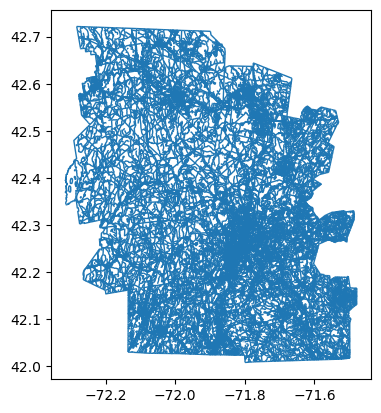

In [4]:
%matplotlib inline
plt.figure(figsize=(20,20))
countymap.plot(linewidth=1)

In [41]:
countymap["MTFCC"].unique()
"""
'S1400', Local Road
'P0002', Shoreline
'H3010', Stream/River
'S1200', Secondary Road
'H1100', Connector
'P0001', Non-visible linear legal boundary
'R1011', Railroad
'S1740', Private Road
'P0004', Other non-visible bounding edge
'L4140', Property Line
'S1100', Primary Road
'S1630', Ramp (highway)
'L4020', Powerline
'S1750', Census Beauru Use
'H3020', Canal
'S1640', Service Road
'S1500', 4WD Trail
'S1820', Bike Path
'S1780', Parking Lot Road
'L4010', Pipeline
'K2459', Runway/Taxiway
'S1710', Pedestrian Trail
'S1730', Alley
'L4130', Point-to-Point Line
'L4110', Fence Line
"""

array(['S1400', 'P0002', 'H3010', 'S1200', 'H1100', 'P0001', 'R1011',
       'S1740', 'P0004', 'L4140', 'S1100', 'S1630', 'L4020', 'S1750',
       'H3020', 'S1640', 'S1500', 'S1820', 'S1780', 'L4010', 'K2459',
       'S1710', 'S1730', 'L4130', 'L4110'], dtype=object)

In [108]:
countymap2 = countymap.loc[(countymap["MTFCC"] == "S1200") | (countymap["MTFCC"] == "S1100") | (countymap["MTFCC"] == "P0001")]

<Axes: >

<Figure size 2000x2000 with 0 Axes>

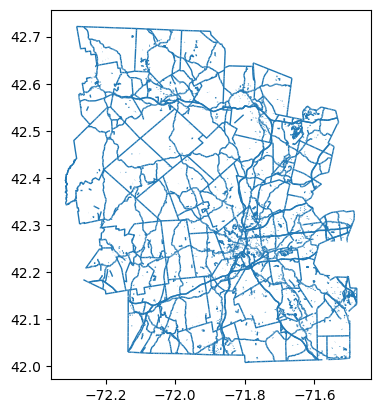

In [109]:
%matplotlib inline
plt.figure(figsize=(20,20))
countymap2.plot(linewidth=1)

In [29]:
countymap3 = countymap.loc[(countymap["MTFCC"] == "S1200")]

<Axes: >

<Figure size 2000x2000 with 0 Axes>

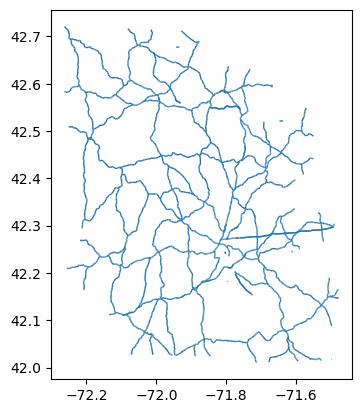

In [30]:
%matplotlib inline
plt.figure(figsize=(20,20))
countymap3.plot(linewidth=1)

In [31]:
newCounty = gpd.read_file("C:\\Users\\brans\\Documents\\DataStructuresFinal\\townssurvey_shp\\TOWNSSURVEY_POLYM.shp")

<Axes: >

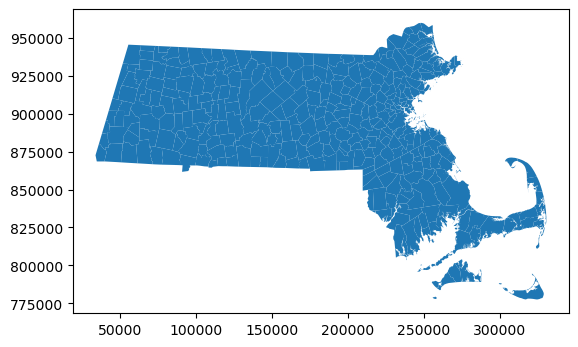

In [32]:
%matplotlib inline
newCounty.plot()

In [155]:
newCounty

,TOWN,TOWN_ID,TYPE,COUNTY,FIPS_STCO,FOURCOLOR,POP1960,POP1970,POP1980,POP1990,POP2000,POP2010,POP2020,POPCH10_20,AREA_ACRES,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry
0,TOLLAND,297,T,HAMPDEN,25013,3,101,172,235,289,426,485,471,-14,20999.966,32.812,38616.445183,8.498383e+07,"POLYGON ((70166.562 878723.735, 73128.383 8781..."
1,CANTON,50,T,NORFOLK,25021,4,12771,17100,18182,18530,20775,21561,24370,2809,12489.087,19.514,33538.192926,5.060814e+07,"POLYGON ((230489.352 886440.005, 231856.862 88..."
2,MASHPEE,172,T,BARNSTABLE,25001,4,867,1288,3700,7884,12946,14006,15060,1054,16384.791,25.601,95479.258305,6.627629e+07,"MULTIPOLYGON (((285275.773 825678.235, 284766...."
3,LYNNFIELD,164,T,ESSEX,25009,4,8398,10826,11267,11274,11542,11596,13000,1404,6683.367,10.443,27878.230478,2.704235e+07,"POLYGON ((236560.782 924900.225, 236574.733 92..."
4,BARNSTABLE,20,TC,BARNSTABLE,25001,3,13465,19842,30898,40949,47821,45193,48916,3723,40077.809,62.622,233289.285937,1.622204e+08,"MULTIPOLYGON (((293046.373 832786.685, 293066...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,STOUGHTON,285,T,NORFOLK,25021,3,16328,23459,26710,26777,27149,26962,29281,2319,10537.857,16.465,31385.419618,4.264484e+07,"POLYGON ((236653.273 878249.025, 236054.633 87..."
347,CHATHAM,55,T,BARNSTABLE,25001,4,3273,4554,6071,6579,6625,6125,6594,469,10906.542,17.043,151757.308105,4.413718e+07,"MULTIPOLYGON (((327202.972 831067.815, 327205...."
348,WEST BOYLSTON,321,T,WORCESTER,25027,4,5526,6369,6204,6611,7481,7669,7877,208,8872.450,13.863,30912.773965,3.590557e+07,"POLYGON ((173840.722 905986.625, 176408.502 90..."
349,HINGHAM,131,T,PLYMOUTH,25023,3,15378,18845,20339,19821,19882,22157,24284,2127,14557.633,22.747,60681.816857,5.875640e+07,"MULTIPOLYGON (((251163.263 891706.995, 251171...."


In [151]:
newCounty["OUTLINE"].unique()

array([4, 2, 1], dtype=int64)

In [33]:
newCounty = newCounty.loc[newCounty["COUNTY"] == "WORCESTER"]

In [34]:
newCounty = newCounty.to_crs("4326")

<class 'shapely.geometry.polygon.Polygon'>


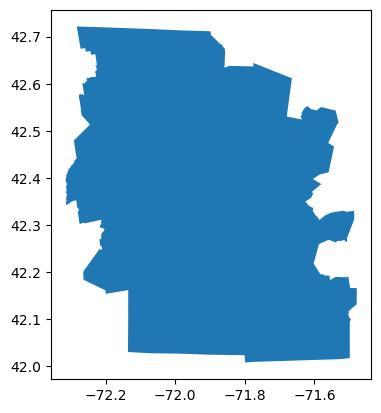

In [71]:
explode = newCounty.dissolve("COUNTY")
explode.plot()
print(type(explode["geometry"][0]))

In [35]:
from shapely.geometry import Point
param = {'name':['HEALTH ALLIANCE - CLINTON HOSPITAL'], 'geometry' : [Point(-71.7619366,42.5407112)]}
llDF = gpd.GeoDataFrame(param, crs="EPSG:4326")

In [36]:
llDF

,name,geometry
0,HEALTH ALLIANCE - CLINTON HOSPITAL,POINT (-71.76194 42.54071)


<Axes: >

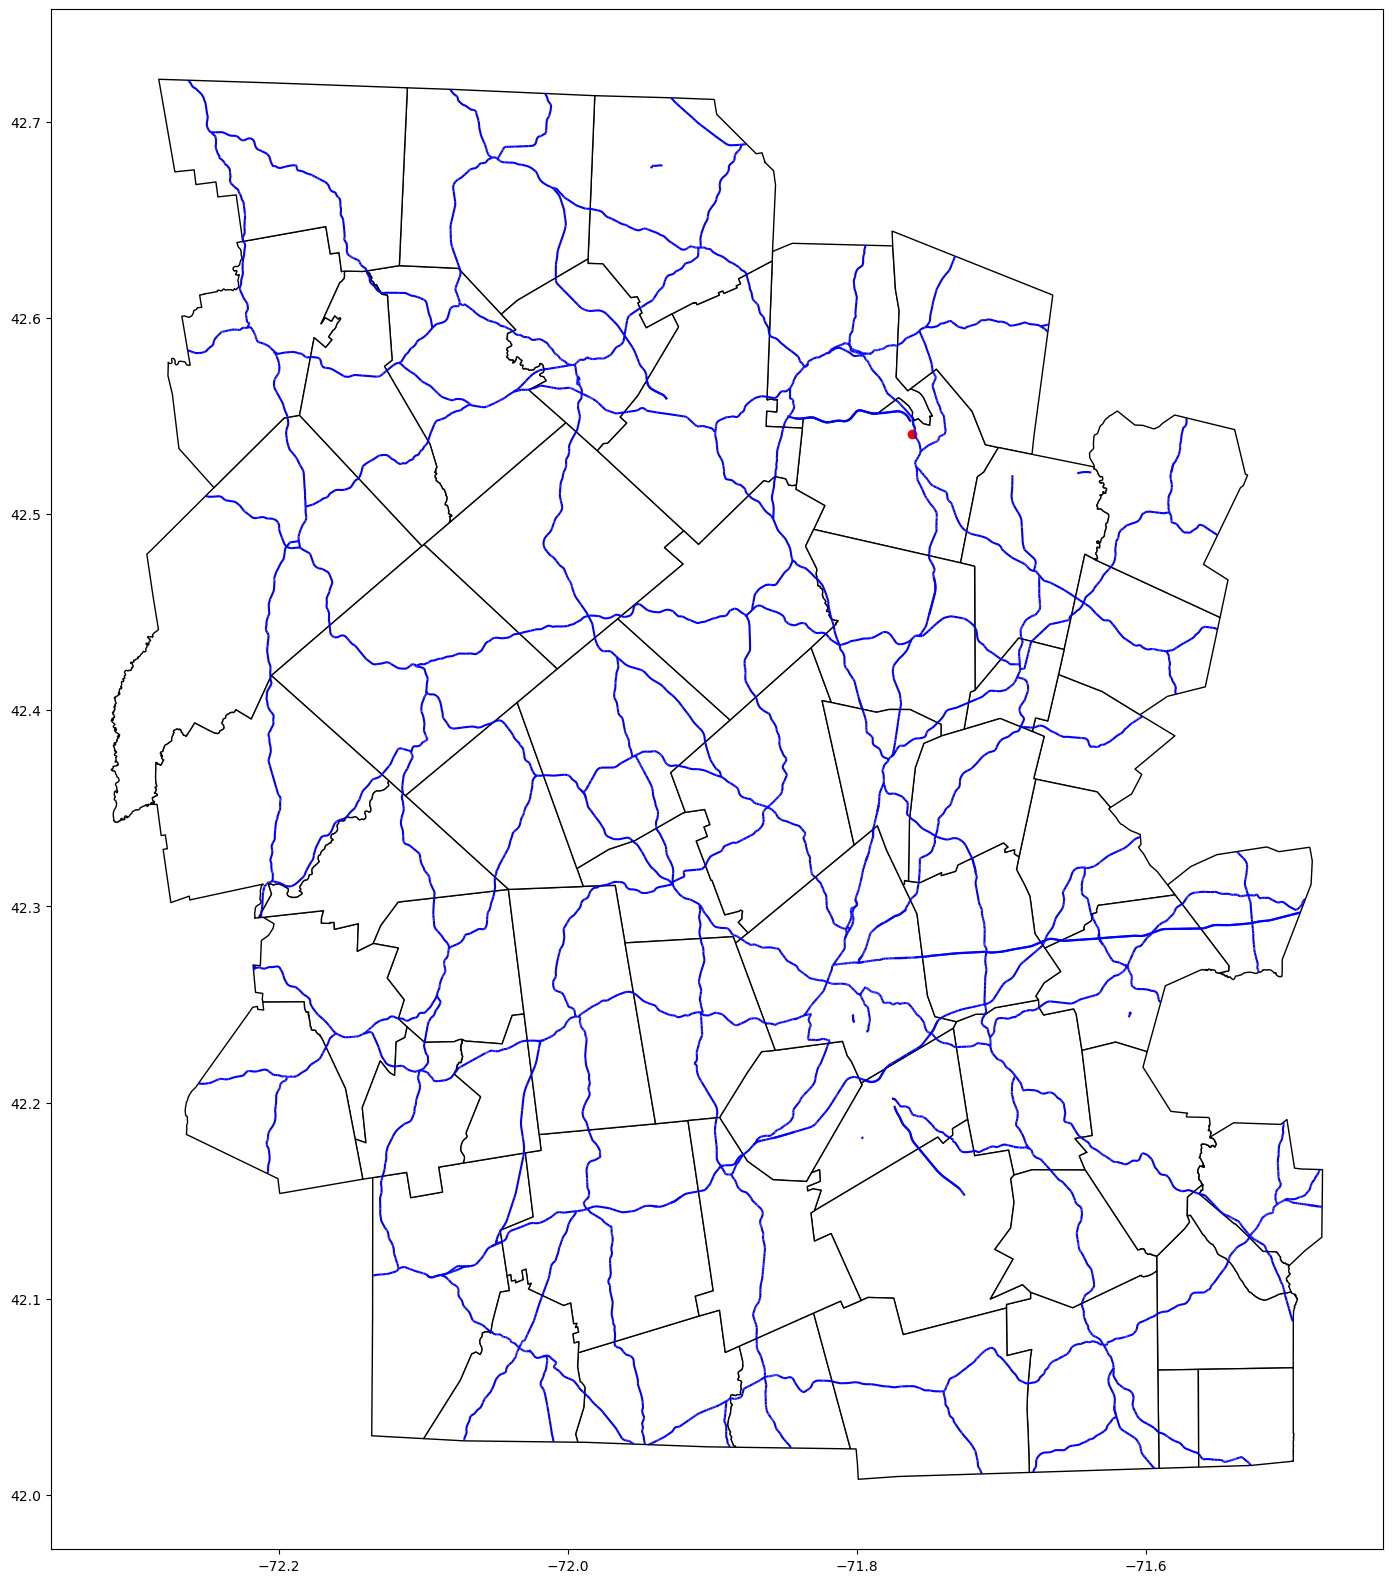

In [37]:
fig, ax = plt.subplots(figsize = (20,20))
newCounty.plot(ax=ax, color='w', edgecolor='black')
countymap3.plot(ax=ax, color='b')
llDF.plot(ax=ax, color="Red")

In [198]:
mydf = pd.read_csv("C:\\Users\\brans\\Documents\\DataStructuresFinal\\InsuranceKeys.csv", compression="gzip")

In [38]:
gpd3

,geometry,group_index,value,center,name,Provider Number
0,"POLYGON ((-71.91196 42.54862, -71.90992 42.547...",0,900.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001
1,"POLYGON ((-72.10913 42.56622, -72.10805 42.566...",0,1800.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001
2,"POLYGON ((-72.30598 42.55900, -72.30404 42.557...",0,2700.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001
3,"POLYGON ((-72.44301 42.59785, -72.44231 42.595...",0,3600.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001
4,"POLYGON ((-72.33928 42.59184, -72.33605 42.590...",0,900.0,"[-72.20899124152677, 42.5851873799782]",ATHOL MEMORIAL HOSPITAL,220003
5,"POLYGON ((-72.48187 42.57843, -72.47385 42.576...",0,1800.0,"[-72.20899124152677, 42.5851873799782]",ATHOL MEMORIAL HOSPITAL,220003
6,"POLYGON ((-72.61507 42.59834, -72.61432 42.600...",0,2700.0,"[-72.20899124152677, 42.5851873799782]",ATHOL MEMORIAL HOSPITAL,220003
7,"POLYGON ((-72.74424 42.60471, -72.74412 42.603...",0,3600.0,"[-72.20899124152677, 42.5851873799782]",ATHOL MEMORIAL HOSPITAL,220003


In [197]:
mydf.to_csv("C:\\Users\\brans\\Documents\\DataStructuresFinal\\InsuranceKeys.csv", compression="gzip")

In [21]:
#idea from https://www.linkedin.com/pulse/isochrones-geopandas-paul-whiteside
from openrouteservice import client as opsClient
api_key = "5b3ce3597851110001cf6248164cba3fefd74520b8bc0de03f42f25a"

def get_isochrone(lat, long, name):
    point = [long, lat]
    
    iso_params = {
        "profile" : "driving-car",
        "intervals" : [900, 1800, 2700, 3600],
        "segments" : 900,
        "locations" : [point]
    }
    
    cl = opsClient.Client(key = api_key)
    r = cl.isochrones(**iso_params)
    
    
    for feature in r['features']:
        feature["properties"]["name"] = name
    
    

In [123]:
import geopandas as gpd
import pandas as pd
import json
import os

os.chdir('C:\\Users\\brans\\Documents\\DataStructuresFinal')
dfs = []

path = "C:/Users/brans/Documents/DataStructuresFinal/previous_sims/MedicalDataFrame_PRVDR_CTGRY_SBTYP_CD_1_2_PRVDR_CTGRY_CD_PRVDR_CTGRY_CD_1/jsons/"

for file in os.listdir(path):
    with open(f"{path}{file}") as f:
        data = json.load(f)
        gpdData = gpd.GeoDataFrame.from_features(data)
        dfs.append(gpdData)

gpd3 = pd.concat(dfs, ignore_index=True)
print(gpd3)

ADCAREHOSPITALOFWORCESTERINC.json
ATHOLMEMORIALHOSPITAL.json
CLINTONHOSPITALASSOCIATION.json
FAIRLAWNHOSPITALINC.json
HEALTHALLIANCE-CLINTONHOSPITAL.json
HEALTHALLIANCEHOSPLEOMINSTERCAMPUS.json
HEYWOODHOSPITAL-.json
HUBBARDREGIONALHOSPITAL.json
MEDCTRCENTRALMASS-WORCESTER,THE.json
MILFORDREGIONALMEDICALCENTER.json
STCAMILLUSHOSPITAL.json
STVINCENTHOSPITAL.json
UMASSMEMORIALHEALH-HARRINGTONHOSPITAL.json
UMASSMEMORIALMEDCTR-MEMORIALCAMP.json
UMASSMEMORIALMEDICALCENTERINC.json
VIBRAHOSPITALOFWESTERNMASS-CENTRALCAMPUS.json
WHITTIERREHABILITATIONHOSPITAL.json
WORCESTERCITYHOSPITAL.json
                                             geometry  group_index   value  \
0   POLYGON ((-71.83409 42.27329, -71.83054 42.265...            0   300.0   
1   POLYGON ((-71.88282 42.28273, -71.88168 42.277...            0   600.0   
2   POLYGON ((-71.92486 42.30556, -71.92250 42.302...            0   900.0   
3   POLYGON ((-72.05400 42.36764, -72.04827 42.365...            0  1800.0   
4   POLYGON ((-72.2383

In [124]:
gpd3 = gpd3.sort_values("value", ascending=False)
gpd3 = gpd3.reset_index(drop = True)

def figureColor(value):
    if value == 300:
        return "#49d6cd"
    elif value == 600:
        return "#f2f531"
    elif value == 900:
        return "#e34312"
    elif value == 1800:
        return "#a81111"
gpd3["color"] = gpd3["value"].apply(figureColor)
gpd3

,geometry,group_index,value,center,name,Provider Number,color
0,"POLYGON ((-72.06691 42.36742, -72.06669 42.366...",0,1800.0,"[-71.8153734, 42.2591184]",WORCESTER CITY HOSPITAL,220115,#a81111
1,"POLYGON ((-72.10913 42.56622, -72.10805 42.566...",0,1800.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001,#a81111
2,"POLYGON ((-71.78831 42.22066, -71.78787 42.218...",0,1800.0,"[-71.52861698686063, 42.13374349858044]",MILFORD REGIONAL MEDICAL CENTER,220090,#a81111
3,"POLYGON ((-71.93596 42.16651, -71.93275 42.168...",0,1800.0,"[-71.5682211, 42.2771768]",WHITTIER REHABILITATION HOSPITAL,222048,#a81111
4,"POLYGON ((-72.08882 42.36040, -72.08865 42.359...",0,1800.0,"[-71.833947, 42.2604932]",FAIRLAWN HOSPITAL INC,220072,#a81111
...,...,...,...,...,...,...,...
67,"POLYGON ((-71.78733 42.54954, -71.78666 42.544...",0,300.0,"[-71.76179548792167, 42.54071273125897]",HEALTH ALLIANCE - CLINTON HOSPITAL,220001,#49d6cd
68,"POLYGON ((-71.86554 42.27873, -71.86392 42.277...",0,300.0,"[-71.833947, 42.2604932]",FAIRLAWN HOSPITAL INC,220072,#49d6cd
69,"POLYGON ((-71.73664 42.43951, -71.73514 42.437...",0,300.0,"[-71.69367625966993, 42.427614654682344]",CLINTON HOSPITAL ASSOCIATION,220058,#49d6cd
70,"POLYGON ((-72.23832 42.59307, -72.23840 42.592...",0,300.0,"[-72.20899124152677, 42.5851873799782]",ATHOL MEMORIAL HOSPITAL,220003,#49d6cd


In [131]:
from shapely.geometry import Point
gpd3["center"] = gpd3["center"].apply(Point)

In [133]:
new = gpd.GeoDataFrame(gpd3[["Provider Number","name","center"]].copy(), geometry = "center")
new

,Provider Number,name,center
0,220115,WORCESTER CITY HOSPITAL,POINT (-71.81537 42.25912)
1,220001,HEALTH ALLIANCE - CLINTON HOSPITAL,POINT (-71.76180 42.54071)
2,220090,MILFORD REGIONAL MEDICAL CENTER,POINT (-71.52862 42.13374)
3,222048,WHITTIER REHABILITATION HOSPITAL,POINT (-71.56822 42.27718)
4,220072,FAIRLAWN HOSPITAL INC,POINT (-71.83395 42.26049)
...,...,...,...
67,220001,HEALTH ALLIANCE - CLINTON HOSPITAL,POINT (-71.76180 42.54071)
68,220072,FAIRLAWN HOSPITAL INC,POINT (-71.83395 42.26049)
69,220058,CLINTON HOSPITAL ASSOCIATION,POINT (-71.69368 42.42761)
70,220003,ATHOL MEMORIAL HOSPITAL,POINT (-72.20899 42.58519)


C:\Users\brans\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\brans\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


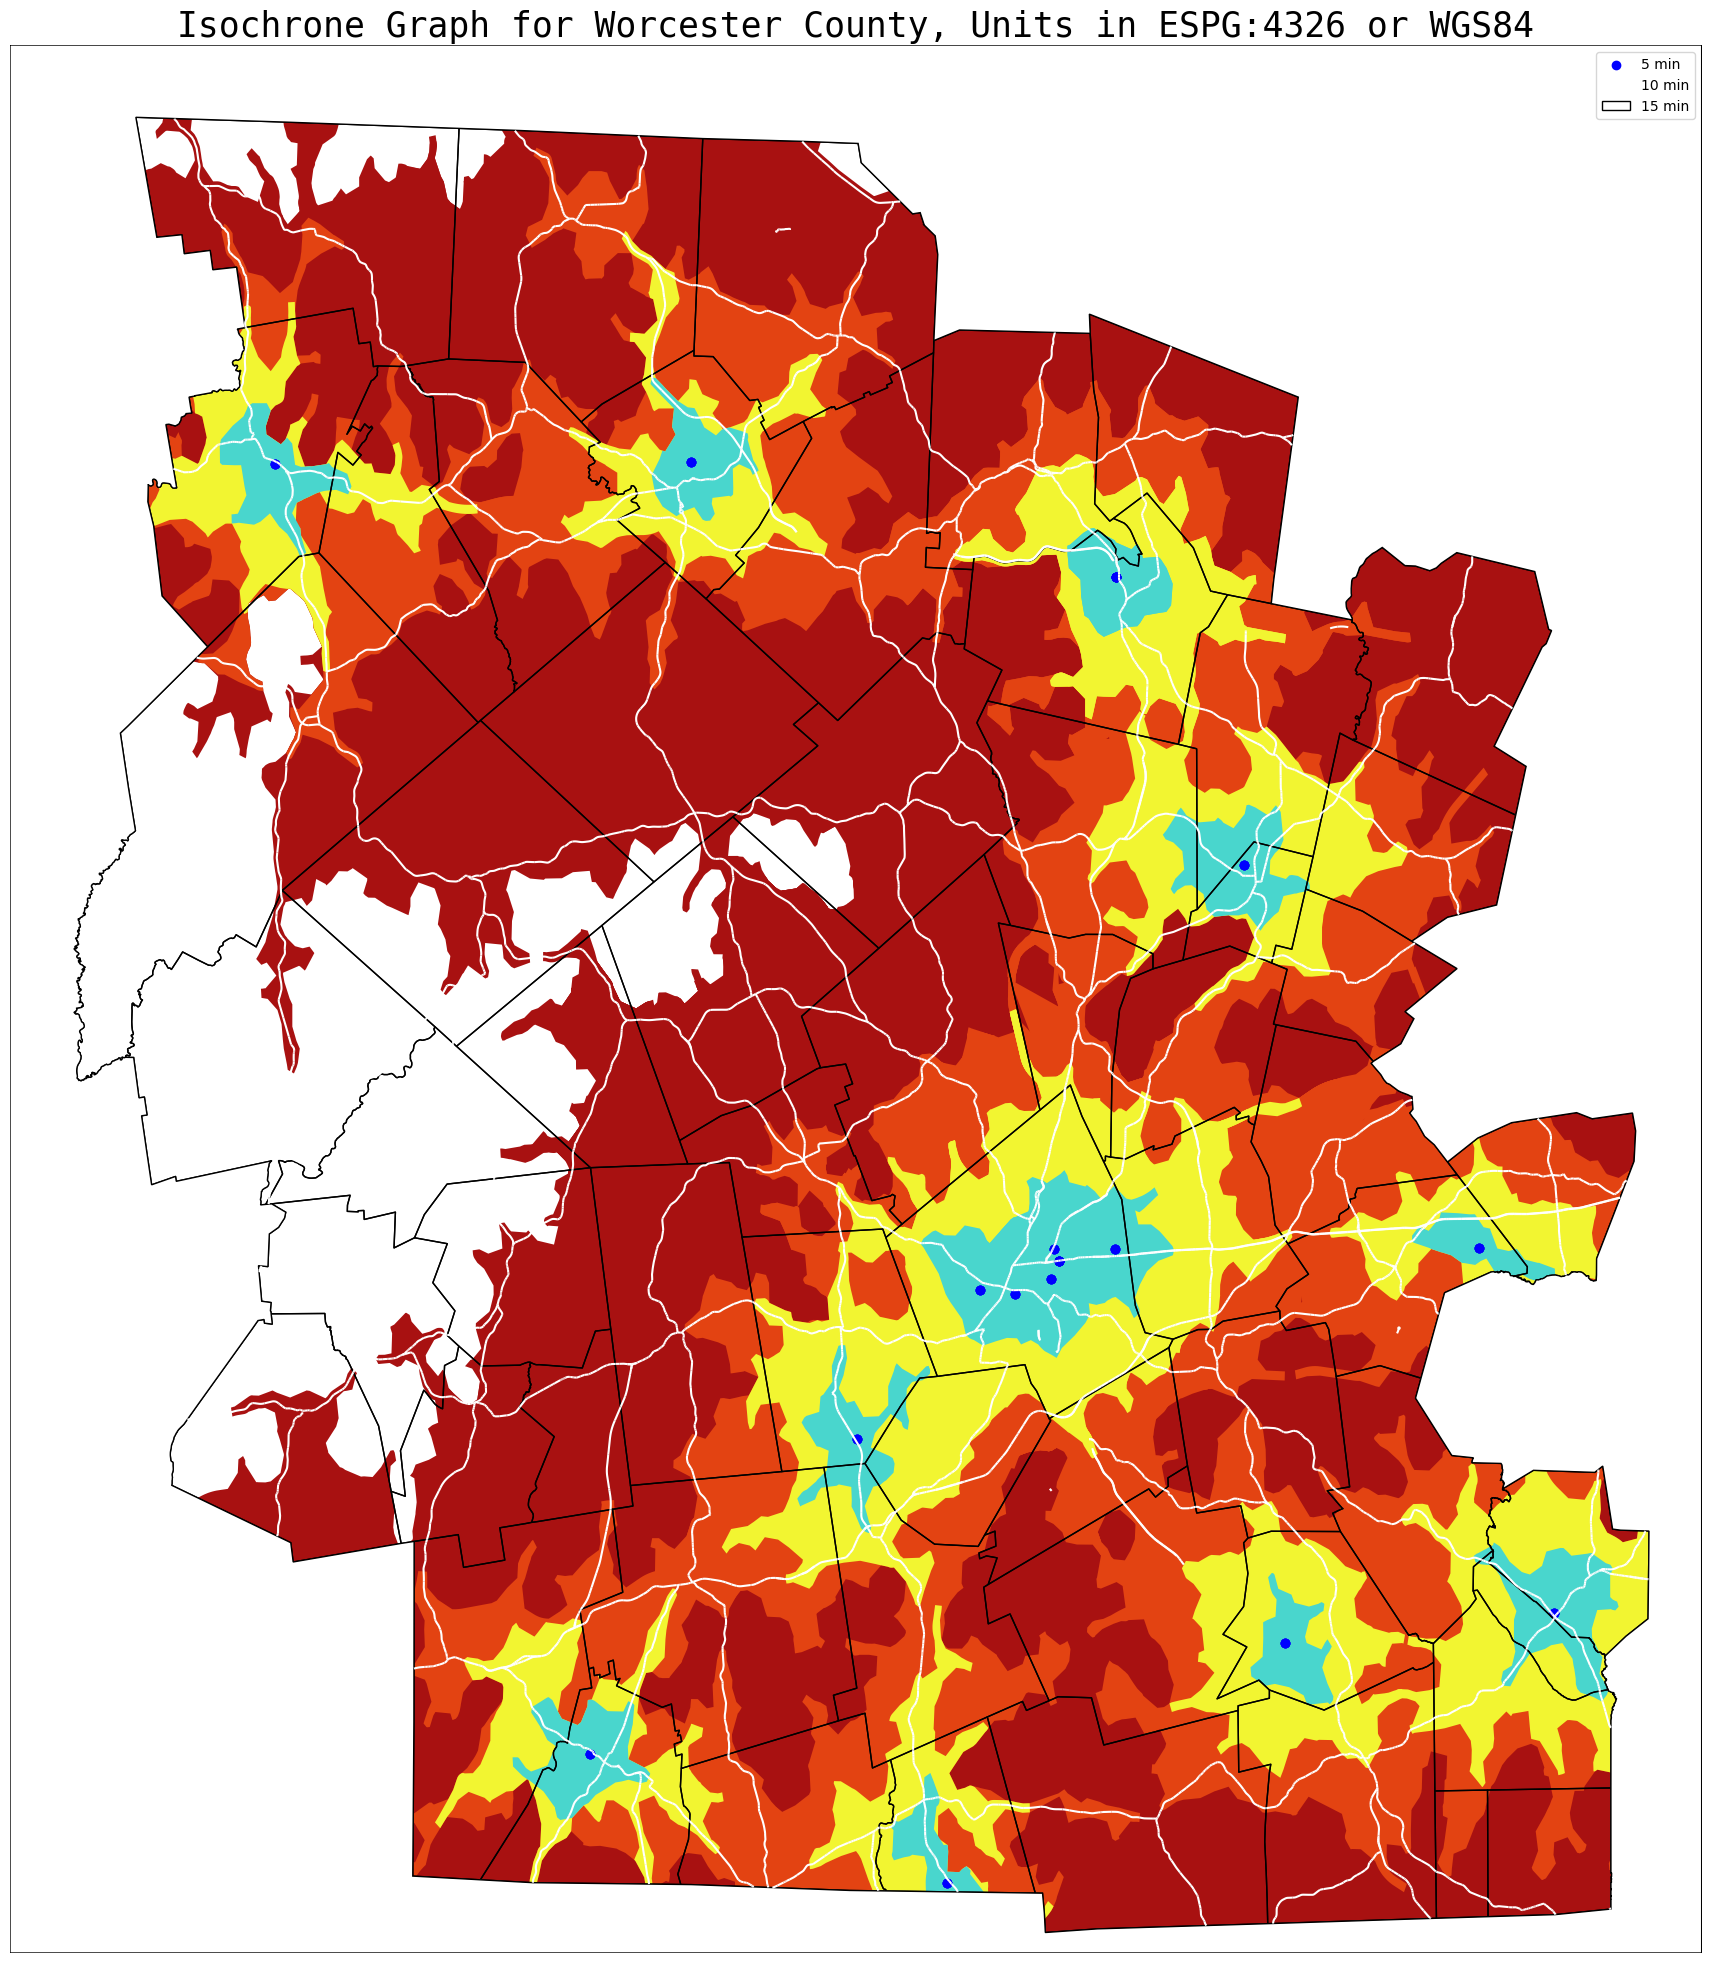

In [148]:
from descartes import PolygonPatch
from shapely.geometry import Polygon

fig, ax = plt.subplots(figsize = (17,20), layout = 'constrained')

ax.axis("scaled")
ax.set_xlim(-72.35, -71.45)
ax.set_ylim(42,42.75)

inner_bound = explode["geometry"][0]



gpd3.plot(ax=ax, color=gpd3["color"])
new.plot(ax=ax, color='b')
newCounty.plot(ax=ax, color='#FF000000', edgecolor='black')
countymap3.plot(ax=ax, color='w')

outer_bound = Polygon([(xlim[0], ylim[0]), (xlim[0], ylim[1]), (xlim[1], ylim[1]), (xlim[1], ylim[0]), (xlim[0], ylim[0])])
inner_bound = explode["geometry"][0]

patchPoly = outer_bound.symmetric_difference(inner_bound)
ax.add_patch(PolygonPatch(patchPoly, facecolor='w', zorder=1))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_title("Isochrone Graph for Worcester County, Units in ESPG:4326 or WGS84", family=["monospace"], size=25)
ax.axis('off')